In [138]:
import pandas as pd 
import numpy as np # importing libraries 1

In [139]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns # importing libraries 2

In [140]:
sns.set(rc={'figure.figsize': (20, 10)}) # plot(1) castomization, for better readability

In [141]:
events_data = pd.read_csv('~/ML_project/1project/data/event_data_train.csv') # reading a csv file:
                                                                             # event_data_train.csv 

In [142]:
submissions_data = pd.read_csv('~/ML_project/1project/data/submissions_data_train.csv') # reading a csv file:
                                                                                       # submissions_data_train.csv 

In [212]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [144]:
submissions_data.head() 

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [145]:
submissions_data.submission_status.unique()

array(['correct', 'wrong'], dtype=object)

In [146]:
events_data.action.unique() # begin of data exploration

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [150]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s') # creating a column with the usual time type

In [151]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [152]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [153]:
events_data['day'] = events_data.date.dt.date # creating a column with the day of the event

In [154]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

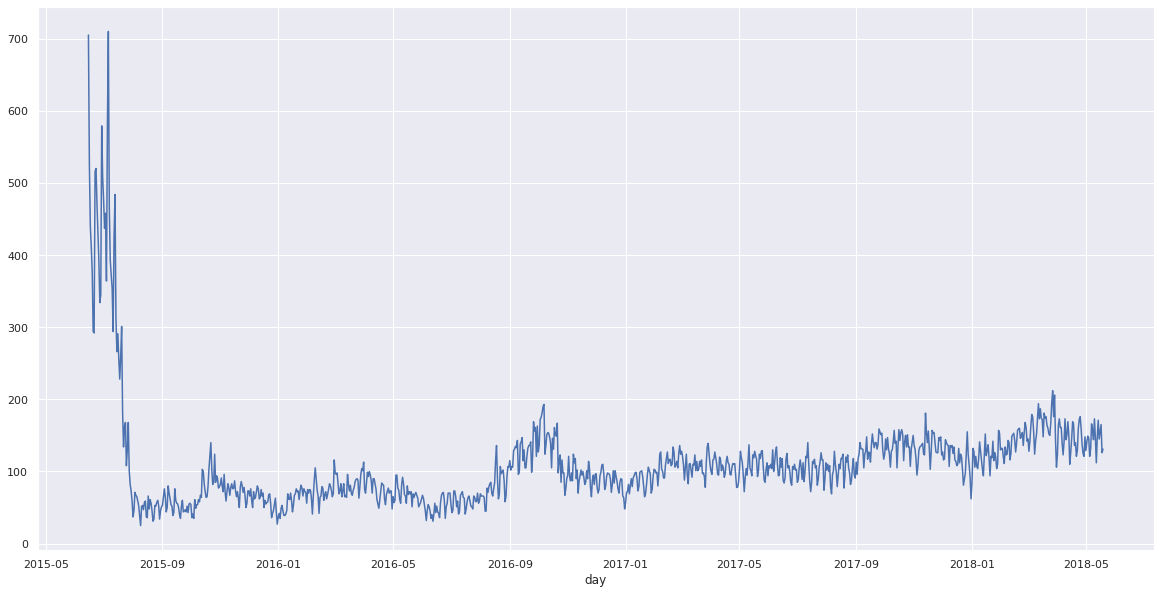

In [155]:
events_data.groupby('day') \
    .user_id.nunique().plot() # plot(1) of new students arrival by date

In [156]:
# wrong decision: forgot the users who have passed 0 steps:

# events_data[events_data.action == 'passed'] \
#    .groupby('user_id', as_index=False) \
#    .agg({'step_id': 'count'}) \
#    .rename(columns = {'step_id': 'passed_steps'}).passed_steps.hist() 

In [157]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index() # datframe: user classification by type of action

In [158]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

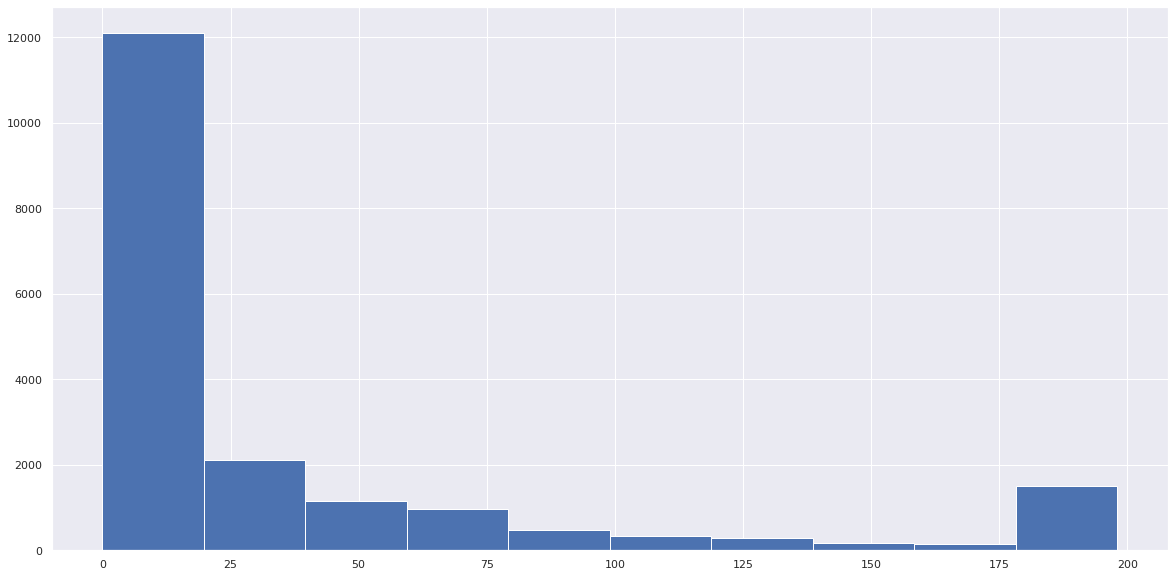

In [159]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().discovered.hist() # plot: 
                                                                      # discovery values from the previous df

In [162]:
                        # CREATING VALID DATAFRAME FOR FUTURE ANALITICS #

In [160]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [163]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [164]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [165]:
gap_data = gap_data / (60 * 60 * 24)

<AxesSubplot:>

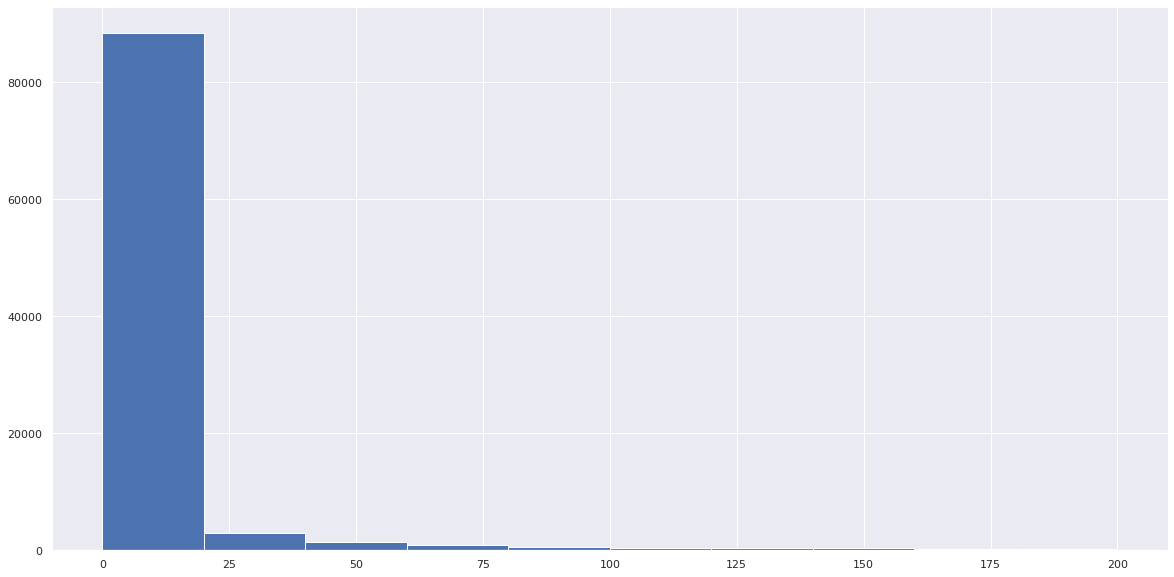

In [166]:
gap_data[gap_data < 200].hist()

In [167]:
gap_data.quantile(0.91)

22.064939004629633

In [168]:
30 * 60 * 60 * 24 # threshold value of timestamp

2592000

In [169]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [173]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns = {'timestamp': 'last_timestamp'})

In [174]:
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [175]:
now = 1526772811
drop_out_threshold = 2592000

In [176]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold # dropped - True, stayed - False

In [177]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [178]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [179]:
users_data = users_data.merge(users_scores, on='user_id', how='outer') # jointing users_scores to users_data

In [180]:
users_data = users_data.fillna(0)

In [181]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [182]:
users_data = users_data.merge(users_events_data, how='outer') # jointing users_events_data to users_data

In [190]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [191]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [192]:
users_data = users_data.merge(users_days, how='outer') # jointing users_days to users_data

In [195]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [196]:
users_data.user_id.nunique() # check

19234

In [198]:
events_data.user_id.nunique() # check sucсessfully finished

19234

In [205]:
users_data['passed_corse'] = users_data.passed > 170 # users, who passed the course
                                                     # passed - True, drop - False

In [206]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
passed_corse,,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [207]:
count_users_passed_course = 100 * 1425 / 17809

In [214]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,False


In [228]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,passed_corse,gap,gap1
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,False,1.0,1.0
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,False,-9.0,-9.0
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,False,-132.0,-132.0
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,False,-13.0,-13.0
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,False,-5.0,-5.0
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,False,1.0,1.0
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,False,-102.0,-102.0
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,False,-10.0,-10.0


In [245]:
users_data.day.max() # 1.11 step 5

478

In [249]:
users_data.query('day == 478') # 1.11 step 5, solution: 1046

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,passed_corse,gap,gap1
781,1046,1525160857,False,421.0,513.0,128,124,721,8122,478,False,False,-580.0,-580.0
